In [11]:
import sqlite3
import pandas as pd
import numpy as np

In [12]:
db = sqlite3.connect('DB_Teste.db')
cursor = db.cursor()

# 1) Listar todas as vendas (ID) e seus respectivos clientes apenas no ano de 2020.

In [13]:
consulta = cursor.execute("SELECT ID, Cliente FROM DB_Teste WHERE DatadaVenda like '%2020'")
consulta = consulta.fetchall()
venda_cliente = pd.DataFrame(consulta, columns=['ID', 'Cliente'])
venda_cliente

,ID,Cliente
0,2020-2039,Cliente 10
1,2020-2113,Cliente 10
2,2020-2161,Cliente 10
3,2020-2162,Cliente 10
4,2020-2233,Cliente 10
...,...,...
300,2020-2954,Cliente 96
301,2020-2928,Cliente 96
302,2020-2164,Cliente 97
303,2020-2285,Cliente 98


# 2) Listar a equipe de cada vendedor

In [14]:
consulta = cursor.execute("SELECT DISTINCT Vendedor, Equipe FROM DB_Teste GROUP BY Vendedor")
consulta = consulta.fetchall()
vendedor_equipe = pd.DataFrame(consulta, columns=['Vendedor', 'Equipe'])
vendedor_equipe

,Vendedor,Equipe
0,Vendedor 1,Time 1
1,Vendedor 10,Time 7
2,Vendedor 11,Time 3
3,Vendedor 12,Time 10
4,Vendedor 13,Time 3
5,Vendedor 14,Time 3
6,Vendedor 15,Time 3
7,Vendedor 16,Time 3
8,Vendedor 17,Time 8
9,Vendedor 18,Time 1


# 3) Construir uma tabela que avalia trimestralmente o resultado de vendas e plote um gráfico deste histórico.

In [15]:
consulta = cursor.execute(
'''SELECT 
	strftime('%Y', (substr(DatadaVenda,7,4) || '-' || substr(DatadaVenda,4,2) || '-' || substr(DatadaVenda,1,2)) ) as Ano,
	CASE
		WHEN 0 + strftime('%m', (substr(DatadaVenda,7,4) || '-' || substr(DatadaVenda,4,2) || '-' || substr(DatadaVenda,1,2)) ) BETWEEN  01 and  03 then '1'
        WHEN 0 + strftime('%m', (substr(DatadaVenda,7,4) || '-' || substr(DatadaVenda,4,2) || '-' || substr(DatadaVenda,1,2)) ) BETWEEN  04 and  06 then '2'
        WHEN 0 + strftime('%m', (substr(DatadaVenda,7,4) || '-' || substr(DatadaVenda,4,2) || '-' || substr(DatadaVenda,1,2)) ) BETWEEN  07 and  09 then '3'
        WHEN 0 + strftime('%m', (substr(DatadaVenda,7,4) || '-' || substr(DatadaVenda,4,2) || '-' || substr(DatadaVenda,1,2)) ) BETWEEN 10 and 12 then '4'
    END AS Trimestre,
	CAST(replace(replace(substr(Valor, 3, length(Valor)), ".", ""), ",", ".") as REAL) as Valor
FROM
	DB_Teste	
GROUP BY
	Ano,
	Trimestre''')
consulta = consulta.fetchall()
tabela_vendas_ano_trismestre = pd.DataFrame(consulta, columns=['Ano', 'Trimestre', 'Valor'])
tabela_vendas_ano_trismestre

,Ano,Trimestre,Valor
0,2018,1,24800.00
1,2018,2,51894.86
2,2018,3,145306.56
3,2018,4,75248.04
4,2019,1,36326.64
5,2019,2,520489.68
6,2019,3,459488.75
7,2019,4,456677.76
8,2020,1,115493.52
9,2020,2,230040.00


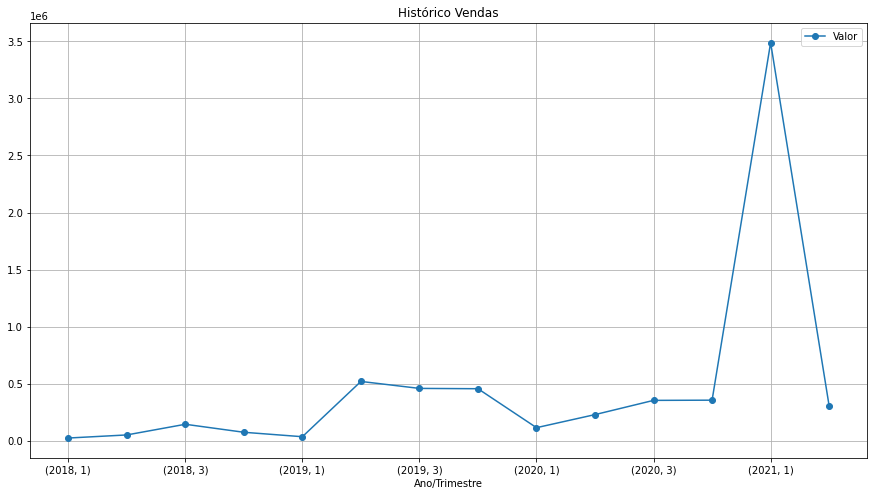

In [16]:
x = tabela_vendas_ano_trismestre.groupby(by=['Ano', 'Trimestre'])[['Valor']].sum()
x.plot(figsize=(15, 8),
       marker='o',
       title='Histórico Vendas',
       grid=True,
       xlabel='Ano/Trimestre');